In [4]:
import otter
grader = otter.Notebook()

# Lab 10: Regression

Welcome to Lab 10!

Today we will get some hands-on practice with linear regression. You can find more information about this topic in
[section 15.2](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html#the-regression-line).

In [5]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
import otter
grader = otter.Notebook()
'imports complete'


'imports complete'

# 1. How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

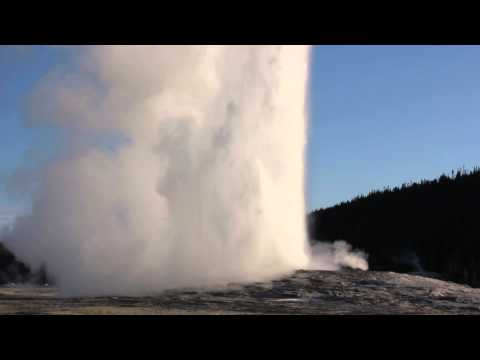

In [6]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  Whenever there is a long eruption, it is usually followed by an even longer wait before the next eruption. If you visit Yellowstone, you might want to predict when the next eruption will happen, so that you can see the rest of the park instead of waiting by the geyser.
 
Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- `duration`: Eruption duration, in minutes
- `wait`: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [7]:
faithful = pd.read_csv("faithful.csv")
faithful

,duration,wait
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
...,...,...
267,4.117,81.0
268,2.150,46.0
269,4.417,90.0
270,1.817,46.0


We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

**Question 1.1.** Make a scatter plot of the data.  It's conventional to put the column we want to predict on the vertical axis and the other column on the horizontal axis.

<!--
BEGIN QUESTION
name: q1_1
-->

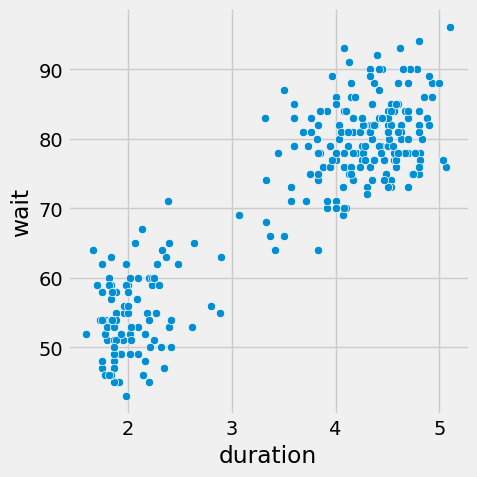

In [8]:
sns.relplot(x = "duration", y= "wait", data = faithful);

**Question 1.2.** Are eruption duration and waiting time roughly linearly related based on the scatter plot above? Is this relationship positive?

<!--
BEGIN QUESTION
name: q1_2
-->

yes, they are roughly linear. the relationship is positive

We're going to continue with the assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.

We'd next like to plot the data in standard units. If you don't remember the definition of standard units, textbook section [14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html#standard-units) might help!

**Question 1.3.** Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  The columns should be named `duration (standard units)` and `wait (standard units)`.

<!--
BEGIN QUESTION
name: q1_3
-->

In [9]:
duration_mean = np.mean(faithful['duration'])
duration_std = np.std(faithful['duration'])
wait_mean = np.mean(faithful['wait'])
wait_std = np.std(faithful['wait'])

duration_su = (faithful['duration']-duration_mean)/duration_std
wait_su = (faithful['wait']-wait_mean)/wait_std

faithful_standard = pd.DataFrame(list(zip(duration_su, wait_su)), 
                                 columns =['duration (standard units)', 'wait (standard units)'])
faithful_standard

,duration (standard units),wait (standard units)
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277
...,...,...
267,0.552298,0.744508
268,-1.174245,-1.834719
269,0.815624,1.407737
270,-1.466537,-1.834719


In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Plot the data again, but this time in standard units.

<!--
BEGIN QUESTION
name: q1_4
-->

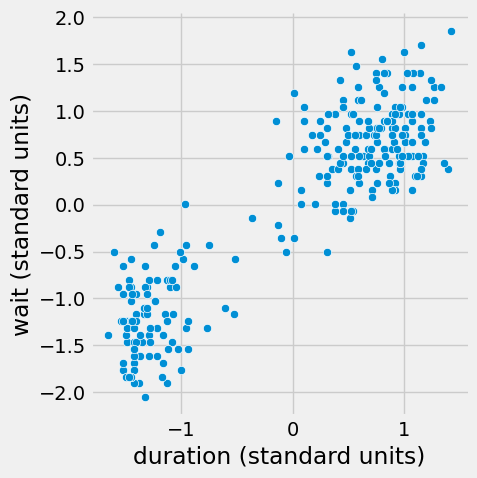

In [11]:
sns.relplot(x = "duration (standard units)", y= "wait (standard units)", data = faithful_standard);

You'll notice that this plot looks the same as the last one!  However, the data and axes are scaled differently.  So it's important to read the ticks on the axes.

**Question 1.5.** Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

1. -1
2. 0
3. 1

Assign `correlation` to the number corresponding to your guess.

<!--
BEGIN QUESTION
name: q1_5
-->

In [12]:
correlation = 3

In [13]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Compute the correlation `r`.  

*Hint:* Use `faithful_standard`.  Section [15.1](https://www.inferentialthinking.com/chapters/15/1/Correlation.html#calculating-r) explains how to do this.


<!--
BEGIN QUESTION
name: q1_6
-->

In [15]:
r = np.mean(faithful_standard["duration (standard units)"] * faithful_standard["wait (standard units)"])
r

0.9008111683218135

In [16]:
grader.check("q1_6")

q1_6 results: All test cases passed!

## 2. The regression line
Recall that the correlation is the **slope of the regression line when the data are put in standard units**.

The next cell plots the regression line in standard units:

$$\text{waiting time in standard units} = r \times \text{eruption duration in standard units}.$$

Then, it plots the data in standard units again, for comparison.

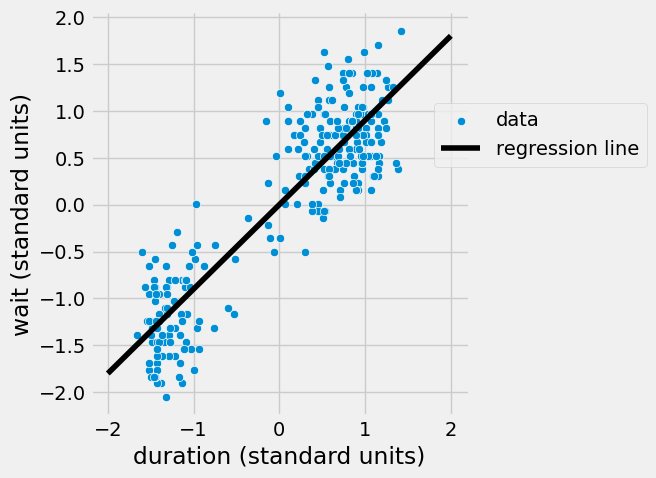

In [18]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    sns.relplot(data = dataset, x = x, y = y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line", color = "black")
    plots.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(faithful_standard, 
                   "duration (standard units)", 
                   "wait (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

How would you take a point in standard units and convert it back to original units?  We'd have to "stretch" its horizontal position by `duration_std` and its vertical position by `wait_std`. That means the same thing would happen to the slope of the line.

Stretching a line horizontally makes it less steep, so we divide the slope by the stretching factor.  Stretching a line vertically makes it more steep, so we multiply the slope by the stretching factor.

**Question 2.1.** Calculate the slope of the regression line in original units, and assign it to `slope`.

(If the "stretching" explanation is unintuitive, consult section [15.2](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html#the-equation-of-the-regression-line) in the textbook.)

<!--
BEGIN QUESTION
name: q2_1
-->

In [21]:
slope = r*(wait_std/duration_std)
slope

10.72964139513353

In [22]:
grader.check("q2_1")

q2_1 results: All test cases passed!

We know that the regression line passes through the point `(duration_mean, wait_mean)`.  You might recall from high-school algebra that the equation for the line is therefore:

$$\text{waiting time} - \verb|wait_mean| = \texttt{slope} \times (\text{eruption duration} - \verb|duration_mean|)$$

The rearranged equation becomes:

$$\text{waiting time} = \texttt{slope} \times \text{eruption duration} + (- \texttt{slope} \times \verb|duration_mean| + \verb|wait_mean|)$$


**Question 2.2.** Calculate the intercept in original units and assign it to `intercept`.

<!--
BEGIN QUESTION
name: q2_2
-->

In [23]:
intercept = wait_mean-(slope*duration_mean)
intercept

33.47439702275334

In [24]:
grader.check("q2_2")

q2_2 results: All test cases passed!

## 3. Investigating the regression line
The slope and intercept tell you exactly what the regression line looks like.  To predict the waiting time for an eruption, multiply the eruption's duration by `slope` and then add `intercept`.

**Question 3.1.** Compute the predicted waiting time for an eruption that lasts 2 minutes, and for an eruption that lasts 5 minutes.

<!--
BEGIN QUESTION
name: q3_1
-->

In [26]:
two_minute_predicted_waiting_time = (slope * 2) + intercept
five_minute_predicted_waiting_time = (slope * 5) + intercept

# Here is a helper function to print out your predictions.
# Don't modify the code below.
def print_prediction(duration, predicted_waiting_time):
    print("After an eruption lasting", duration,
          "minutes, we predict you'll wait", predicted_waiting_time,
          "minutes until the next eruption.")

print_prediction(2, two_minute_predicted_waiting_time)
print_prediction(5, five_minute_predicted_waiting_time)

After an eruption lasting 2 minutes, we predict you'll wait 54.9336798130204 minutes until the next eruption.
After an eruption lasting 5 minutes, we predict you'll wait 87.12260399842098 minutes until the next eruption.


The next cell plots the line that goes between those two points, which is (a segment of) the regression line.

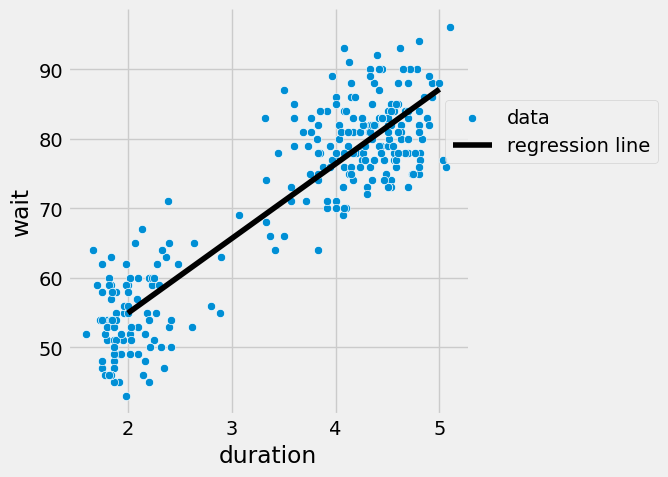

In [27]:
plot_data_and_line(faithful, "duration", "wait", 
                   [2, two_minute_predicted_waiting_time], 
                   [5, five_minute_predicted_waiting_time])

**Question 3.2.** Make predictions for the waiting time after each eruption in the `faithful` table.  (Of course, we know exactly what the waiting times were!  We are doing this so we can see how accurate our predictions are.)  Put these numbers into a column in a new table called `faithful_predictions`.  Its first row should look like this:

|duration|wait|predicted wait|
|-|-|-|
|3.6|79|72.1011|

*Hint:* Your answer can be just one line.  There is no need for a `for` loop; use array arithmetic instead.

<!--
BEGIN QUESTION
name: q3_2
-->

In [47]:
# We will first duplicate faithful and then add a new column of our predictions
faithful_predictions = faithful.copy()

faithful_predictions["predicted wait"] = (slope * faithful_predictions["duration"]) + intercept
faithful_predictions

,duration,wait,predicted wait
0,3.600,79.0,72.101106
1,1.800,54.0,52.787752
2,3.333,74.0,69.236292
3,2.283,62.0,57.970168
4,4.533,85.0,82.111861
...,...,...,...
267,4.117,81.0,77.648331
268,2.150,46.0,56.543126
269,4.417,90.0,80.867223
270,1.817,46.0,52.970155


In [48]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** How close were we?  Compute the *residual* for each eruption in the dataset.  The residual is the actual waiting time minus the predicted waiting time.  Add the residuals to `faithful_predictions` as a new column called `residual` and name the resulting table `faithful_residuals`.

*Hint:* Again, your code will be much simpler if you don't use a `for` loop.

<!--
BEGIN QUESTION
name: q3_3
-->

In [53]:
faithful_residuals = faithful_predictions.copy()

faithful_residuals["residual"] = faithful_residuals["wait"] - faithful_residuals["predicted wait"]
faithful_residuals

,duration,wait,predicted wait,residual
0,3.600,79.0,72.101106,6.898894
1,1.800,54.0,52.787752,1.212248
2,3.333,74.0,69.236292,4.763708
3,2.283,62.0,57.970168,4.029832
4,4.533,85.0,82.111861,2.888139
...,...,...,...,...
267,4.117,81.0,77.648331,3.351669
268,2.150,46.0,56.543126,-10.543126
269,4.417,90.0,80.867223,9.132777
270,1.817,46.0,52.970155,-6.970155


In [55]:
grader.check("q3_3")

q3_3 results: All test cases passed!

Here is a plot of the residuals you computed.  Each point corresponds to one eruption.  It shows how much our prediction over- or under-estimated the waiting time.

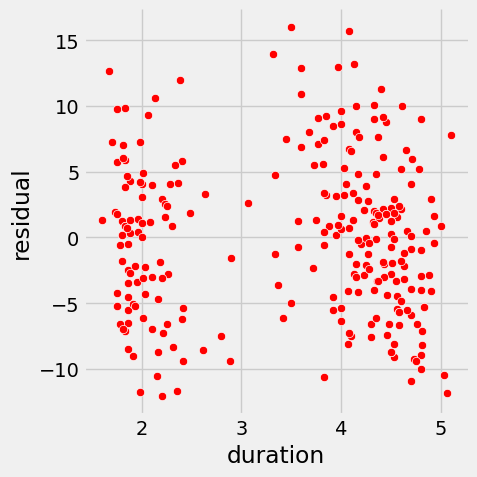

In [56]:
sns.relplot(x = "duration", y = "residual", data = faithful_residuals, color="r");

There isn't really a pattern in the residuals, which confirms that it was reasonable to try linear regression.  It's true that there are two separate clouds; the eruption durations seemed to fall into two distinct clusters.  But that's just a pattern in the eruption durations, not a pattern in the relationship between eruption durations and waiting times.

## 4. How accurate are different predictions?
Earlier, you should have found that the correlation is fairly close to 1, so the line fits fairly well on the training data.  That means the residuals are overall small (close to 0) in comparison to the waiting times.

We can see that visually by plotting the waiting times and residuals together:

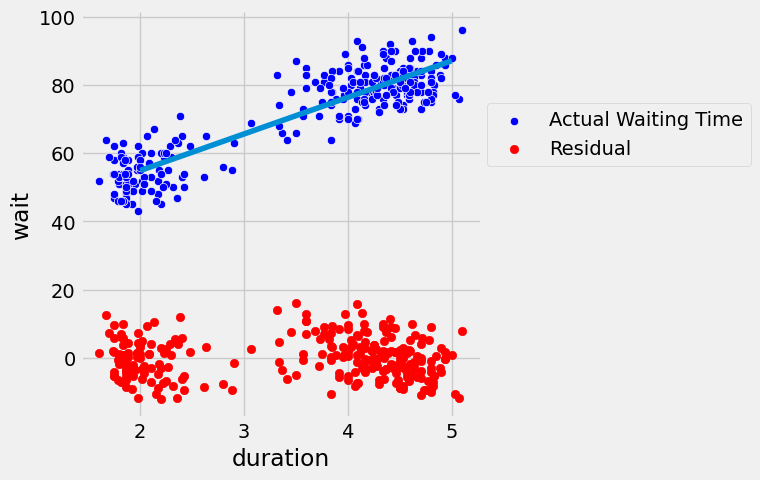

In [58]:
sns.relplot(x = "duration", y = "wait", data = faithful_residuals, color="blue")
plots.scatter(faithful_residuals["duration"], faithful_residuals["residual"], color="r")
plots.plot([2, 5], [two_minute_predicted_waiting_time, five_minute_predicted_waiting_time], label="regression line")
plots.legend(labels=['Actual Waiting Time', 'Residual'], bbox_to_anchor=(1.7,.8));

However, unless you have a strong reason to believe that the linear regression model is true, you should be wary of applying your prediction model to data that are very different from the training data.

**Question 4.1.** In `faithful`, no eruption lasted exactly 0, 2.5, or 60 minutes.  Using this line, what is the predicted waiting time for an eruption that lasts 0 minutes?  2.5 minutes?  An hour?

<!--
BEGIN QUESTION
name: q4_1
-->

In [62]:
zero_minute_predicted_waiting_time = (slope * 0) + intercept
two_point_five_minute_predicted_waiting_time = (slope * 2.5) + intercept
hour_predicted_waiting_time = (slope * 60) + intercept

print_prediction(0, zero_minute_predicted_waiting_time)
print_prediction(2.5, two_point_five_minute_predicted_waiting_time)
print_prediction(60, hour_predicted_waiting_time)

After an eruption lasting 0 minutes, we predict you'll wait 33.47439702275334 minutes until the next eruption.
After an eruption lasting 2.5 minutes, we predict you'll wait 60.29850051058716 minutes until the next eruption.
After an eruption lasting 60 minutes, we predict you'll wait 677.2528807307651 minutes until the next eruption.


In [63]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 2.** For each prediction, state whether you think it's reliable and explain your reasoning. 

<!--
BEGIN QUESTION
name: q4_2
-->

I don't think the 0 minute prediction is reliable, as it is not a reasonable wait time. However, I believe that the 2.5 is reliable because it is a reasonable waiting time. The 60 minute is also unreliable as it is very far as an outlier.

## 5. Divide and Conquer

It appears from the scatter diagram that there are two clusters of points: one for durations around 2 and another for durations between 3.5 and 5. A vertical line at 3 divides the two clusters.

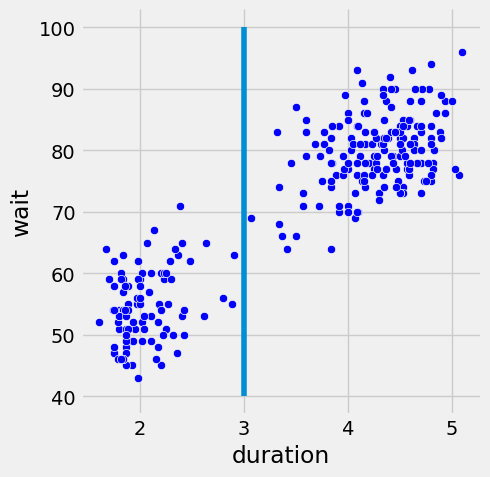

In [158]:
sns.relplot(x = "duration", y = "wait", data = faithful, color="blue")
plots.plot([3, 3], [40, 100]);

The `standardize` function from lecture appears below, which takes in a table with numerical columns and returns the same table with each column converted into standard units.

In [159]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a DataFrame in which all columns of t are converted to standard units."""
    t_su = pd.DataFrame({"index": np.arange(1,271)})
    for label in t.columns.values:
        t_su = t_su.join(pd.DataFrame({label + ' (su)': standard_units(t[label])}))
    return t_su

In [179]:
standardize(faithful).iloc[:, 2]

0      0.597123
1     -1.245181
2      0.228663
3     -0.655644
4      1.039277
         ...   
265   -0.803028
266    0.302355
267    0.744508
268   -1.834719
269    1.407737
Name: wait (su), Length: 270, dtype: float64

**Question 1.** Separately compute the regression coefficients *r* for all the points with a duration below 3 **and then** for all the points with a duration above 3. To do so, create a function that computes `r` from a table and pass it two different tables of points, `below_3` and `above_3`.

<!--
BEGIN QUESTION
name: q5_1
-->

In [192]:
below_3.iloc[:, 0]

1      1.800
3      2.283
5      2.883
8      1.950
10     1.833
       ...  
262    1.850
264    1.983
265    2.250
268    2.150
270    1.817
Name: duration, Length: 97, dtype: float64

In [165]:
def reg_coeff(t):
    """Return the regression coefficient for columns 0 & 1."""
    t_su = standardize(t)
    return np.mean(t_su.iloc[:, 1] * t_su.iloc[:, 2])

below_3 = faithful[faithful['duration'] < 3]
above_3 = faithful[faithful['duration'] > 3]
below_3_r = reg_coeff(below_3)
above_3_r = reg_coeff(above_3)
print("For points below 3, r is", below_3_r, "; for points above 3, r is", above_3_r)

For points below 3, r is 0.2805262439611596 ; for points above 3, r is 0.37739414883824546


In [195]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** Complete the functions `slope_of` and `intercept_of` below. 

When you're done, the functions `wait_below_3` and `wait_above_3` should each use a different regression line to predict a wait time for a duration. The first function should use the regression line for all points with duration below 3. The second function should use the regression line for all points with duration above 3.

<!--
BEGIN QUESTION
name: q5_2
-->

In [209]:
def slope_of(t, r):
    """Return the slope of the regression line for t in original units.
    
    Assume that column 0 contains x values and column 1 contains y values.
    r is the regression coefficient for x and y.
    """
    return r*(np.std(t.iloc[:, 1])/np.std(t.iloc[:, 0])) # maybe works TODO

def intercept_of(t, r):
    """Return the slope of the regression line for t in original units."""
    s = slope_of(t, r)
    return np.mean(t.iloc[:, 1])-(s*np.mean(t.iloc[:, 0]))
    
below_3_a = slope_of(below_3, below_3_r)
below_3_b = intercept_of(below_3, below_3_r)
above_3_a = slope_of(above_3, above_3_r)
above_3_b = intercept_of(above_3, above_3_r)

def wait_below_3(duration):
    return below_3_a * duration + below_3_b

def wait_above_3(duration):
    return above_3_a * duration + above_3_b

In [210]:
grader.check("q5_2")

q5_2 results: All test cases passed!

The plot below shows two different regression lines, one for each cluster!

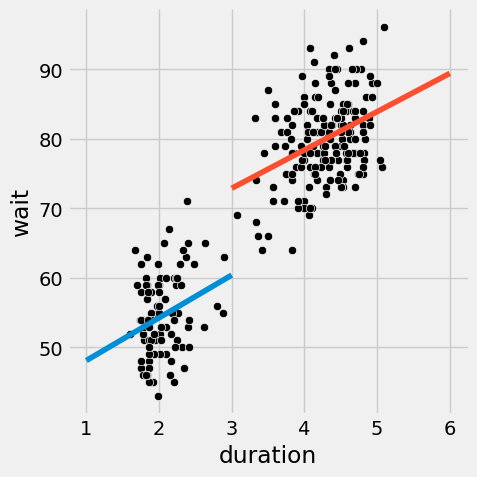

In [211]:
sns.relplot(x = "duration", y = "wait",data = faithful, color = "black")
plots.plot([1, 3], [wait_below_3(1), wait_below_3(3)])
plots.plot([3, 6], [wait_above_3(3), wait_above_3(6)]);

**Question 3.** Write a function `predict_wait` that takes a `duration` and returns the predicted wait time using the appropriate regression line, depending on whether the duration is below 3 or greater than (or equal to) 3.

In [217]:
def predict_wait(duration):
    """Return the wait predicted by the appropriate one of the two regression lines above."""
    if duration < 3:
        return wait_below_3(duration)
    if duration >= 3:
        return wait_above_3(duration)

In [218]:
grader.check("q5_3")

q5_3 results: All test cases passed!

The predicted wait times for each point appear below.

In [227]:
predicted = faithful["duration"].apply(predict_wait)

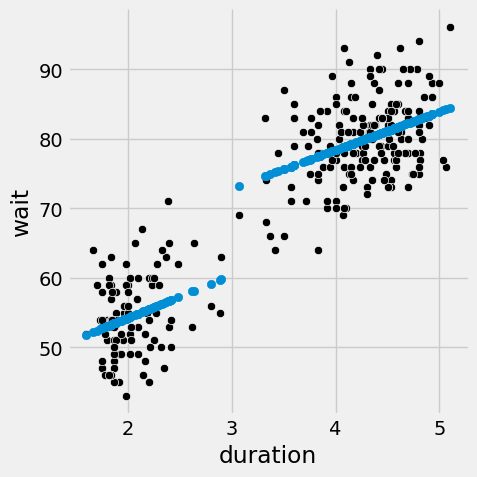

In [228]:
#sns.relplot(faithful["duration"], faithful["wait"], color = "black")
sns.relplot(x = "duration", y = "wait",data = faithful, color = "black")
plots.scatter(faithful["duration"], predicted);

**Question 4.** Do you think the predictions produced by `predict_wait` would be more or less accurate than the predictions from the regression line you created in section 2? How could you tell?

I believe these predictions would be much more accurate as they take into account two different regression lines that fit the clusters for their respective regions. Whereas with the first set of predictions, the line would be accurate in the center of the two clusters, but would produce higher or lower wait times respective to whether the duration point being predicted was closer to the edge of a cluster or not.

That's it! You've completed Lab 10. Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the Lab10 assignment in **Canvas** by 11:59pm on the due date.